# Simple Stock Classes and Objects

## This tutorial teaches how to write simple classes and objects for stock.

In [1]:
# Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,79.382858,79.575714,78.860001,79.018570,71.591667,58671200
2014-01-03,78.980003,79.099998,77.204285,77.282860,70.019096,98116900
2014-01-06,76.778572,78.114288,76.228569,77.704285,70.400902,103152700
2014-01-07,77.760002,77.994286,76.845711,77.148575,69.897423,79302300
2014-01-08,76.972855,77.937141,76.955711,77.637146,70.340096,64632400


## Create Basic Class

In [3]:
class stock_data:
    def __init__(self):
        pass
    
    def function(self):
        print("Here my stock data:\n", dataset)

In [4]:
myobject = stock_data
print(myobject.function(dataset))

Here my stock data:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02   79.382858   79.575714   78.860001   79.018570   71.591667   
2014-01-03   78.980003   79.099998   77.204285   77.282860   70.019096   
2014-01-06   76.778572   78.114288   76.228569   77.704285   70.400902   
2014-01-07   77.760002   77.994286   76.845711   77.148575   69.897423   
2014-01-08   76.972855   77.937141   76.955711   77.637146   70.340096   
2014-01-09   78.114288   78.122856   76.478569   76.645714   69.441841   
2014-01-10   77.118568   77.257141   75.872856   76.134285   68.978462   
2014-01-13   75.701431   77.500000   75.697144   76.532860   69.339584   
2014-01-14   76.888573   78.104286   76.808571   78.055717   70.719322   
2014-01-15   79.074287   80.028572   78.808571   79.622856   72.139168   
2014-01-16   79.271431   79.550003   78.811432   79.178574   71.736649   
2014-01-17   78.7

## Create Class of Exploratory Data

In [5]:
# Create class
class ExploratoryData:
    # Initialize class with self argument
    def __init__(self):
        pass
    
    # Define class method which takes self argument: print_stock_summary
    def print_stock_summary(self):
        # Print string
        print("__________________Exploratory Data Analysis__________________")
        print("Stock Data")
        print('-'*60)
        print("Dataset information") 
        print(dataset.info(memory_usage='deep',verbose=False))
        print('-'*60)
        print(dataset.info())
        print('-'*60)
        print("Data type:")
        print(dataset.dtypes)
        print('-'*60)
        print("Check unique values wihtout NaN")
        print(dataset.nunique())
        print('-'*60)
        print("Data shape:")
        print(dataset.shape)
        print('-'*60)
        print("Data columns Names:")
        print(dataset.columns)
        print('-'*60)
        print("Check for NaNs:")
        print(dataset.isnull().values.any())
        print("Check for NaNs in rows:")
        print(dataset.isnull().sum(axis = 0))
        print("Check for NaNs in columns:")
        print(dataset.isnull().sum(axis = 1))
        print('-'*60)
        print("Data Statistics Summary:")
        print(dataset.describe())

In [6]:
ExploratoryData.print_stock_summary(dataset)

__________________Exploratory Data Analysis__________________
Stock Data
------------------------------------------------------------
Dataset information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Columns: 6 entries, Open to Volume
dtypes: float64(5), int32(1)
memory usage: 63.9 KB
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int32
dtypes: float64(5), int32(1)
memory usage: 63.9 KB
None
------------------------------------------------------------
Data type:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int32
dtype: object
--

## Create Class of daily returns and plot histogram

In [7]:
# Create class: DataShell
class StockReturns:
  
	# Initialize class with self and stockData as arguments
    def __init__(self, stockData):
      	# Set data as instance variable, and assign it the value of stockData
        self.data = stockData
    
    # Define Log Returns
    def stock_log(self):
        log_returns = np.log(dataset['Adj Close'].shift(-1)) - np.log(dataset['Adj Close'])
        return log_returns
    
	# Define MU
    def stock_mu(self):
        log_returns = np.log(dataset['Adj Close'].shift(-1)) - np.log(dataset['Adj Close'])
        mu = log_returns.mean()
        return mu
        
    # Define Sigma
    def stock_sigma(self):
        log_returns = np.log(dataset['Adj Close'].shift(-1)) - np.log(dataset['Adj Close'])
        sigma = log_returns.std(ddof=1)
        return sigma

In [8]:
stock_data = StockReturns(dataset)

In [9]:
stock_data.stock_log()

Date
2014-01-02   -0.022211
2014-01-03    0.005438
2014-01-06   -0.007177
2014-01-07    0.006313
2014-01-08   -0.012852
2014-01-09   -0.006695
2014-01-10    0.005222
2014-01-13    0.019703
2014-01-14    0.019878
2014-01-15   -0.005595
2014-01-16   -0.024807
2014-01-17    0.015417
2014-01-21    0.004434
2014-01-22    0.008432
2014-01-23   -0.018345
2014-01-24    0.008080
2014-01-27   -0.083303
2014-01-28   -0.011417
2014-01-29   -0.001939
2014-01-30    0.001639
2014-01-31    0.001856
2014-02-03    0.014372
2014-02-04    0.007441
2014-02-05    0.005812
2014-02-06    0.013893
2014-02-07    0.017756
2014-02-10    0.013090
2014-02-11   -0.000074
2014-02-12    0.015754
2014-02-13   -0.000808
                ...   
2018-11-15    0.011015
2018-11-16   -0.040439
2018-11-19   -0.048957
2018-11-20   -0.001131
2018-11-21   -0.025727
2018-11-23    0.013433
2018-11-26   -0.002179
2018-11-27    0.037732
2018-11-28   -0.007712
2018-11-29   -0.005417
2018-11-30    0.034346
2018-12-03   -0.044986
2018-1

In [10]:
stock_data.stock_log().head()

Date
2014-01-02   -0.022211
2014-01-03    0.005438
2014-01-06   -0.007177
2014-01-07    0.006313
2014-01-08   -0.012852
Name: Adj Close, dtype: float64

In [11]:
stock_data.stock_mu()

0.0006219938148640764

In [12]:
stock_data.stock_sigma()

0.015077566404571254

## Create Class of Family

In [13]:
# Define Class of family for stock
class Stock_Data:
    # Stock_Family = 'DataStock'
    def __init__(self): 
        self.data = dataset

# Define class Plot_Line
class Plot_Line(Stock_Data):
    def __init__(self):
        f = plt.figure(figsize=(14,10))
        plt.plot(self.data['Adj Close'])
        plt.legend(loc='best')
        plt.title('Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price')
        return f
    
# Define class Plot_hist
class Plot_hist(Stock_Data):
    def __init__(self):
        f = plt.figure(figsize=(14,10))
        plt.hist(self.data['Adj Close'])
        plt.legend(loc='best')
        plt.title('Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price')
        return f

In [14]:
class Stock_Data(object):
    def __init__(self): 
        pass
      
    # Define class Plot_Line
    def Plot_Line(self):
        plt.figure(figsize=(14,10))
        plt.plot(dataset['Adj Close'])
        plt.legend(loc='best')
        plt.title('Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price')
        return 
    
    # Define class Plot_hist
    def Plot_hist(sef):
        f = plt.figure(figsize=(14,10))
        plt.hist(dataset['Adj Close'])
        plt.title('Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price')
        return

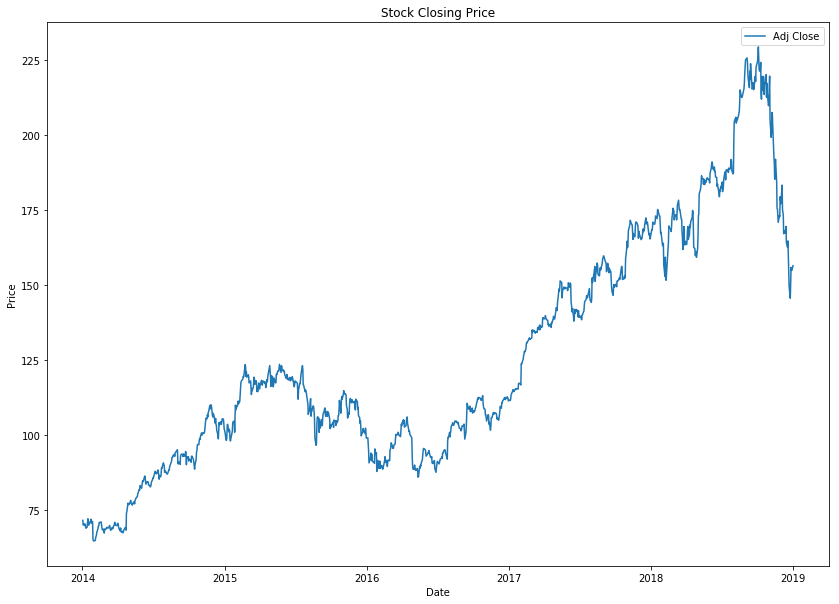

In [15]:
Stock_Data.Plot_Line(dataset)

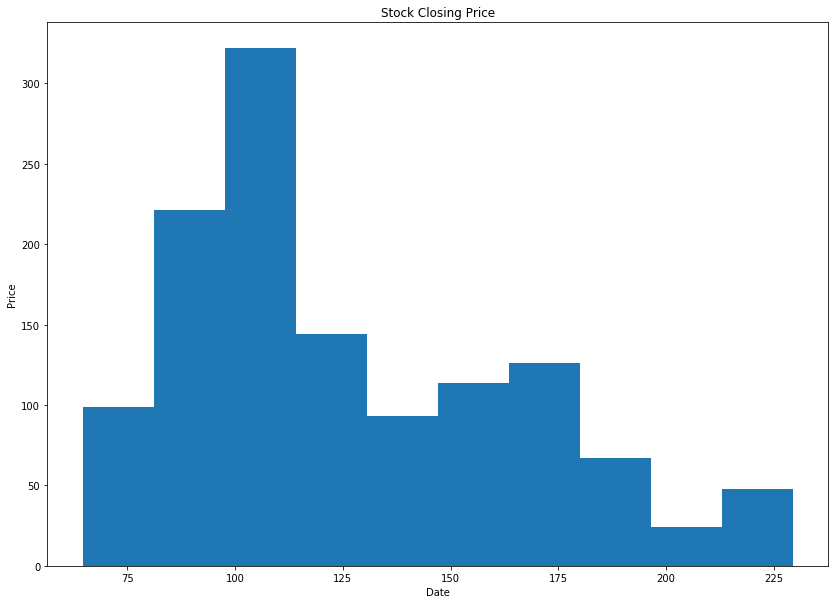

In [16]:
Stock_Data.Plot_hist(dataset)

## Classes and Instances

In [17]:
class Stock:
	# Initialize class with self, symbol, start, and end as arguments
    def __init__(self, symbol, start, end):
      	# Set data as instance variable, and assign it the variables of stock
        self.symbol = symbol
        self.start = start
        self.end = end
    
    def get_descriptive_data(self):
        dataset = yf.download(self.symbol,self.start,self.end)
        return dataset

In [18]:
df = Stock('AMD','2014-01-01', '2019-01-01')
print(df.get_descriptive_data())

[*********************100%***********************]  1 of 1 downloaded
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02   3.850000   3.980000   3.840000   3.950000   3.950000   20548400
2014-01-03   3.980000   4.000000   3.880000   4.000000   4.000000   22887200
2014-01-06   4.010000   4.180000   3.990000   4.130000   4.130000   42398300
2014-01-07   4.190000   4.250000   4.110000   4.180000   4.180000   42932100
2014-01-08   4.230000   4.260000   4.140000   4.180000   4.180000   30678700
2014-01-09   4.200000   4.230000   4.050000   4.090000   4.090000   30667600
2014-01-10   4.090000   4.200000   4.070000   4.170000   4.170000   20840800
2014-01-13   4.190000   4.200000   4.090000   4.130000   4.130000   22856100
2014-01-14   4.140000   4.300000   4.130000   4.300000   4.300000   42434800
2014-01-15   4.340000   4.600000   4.320000   4.470000   4.470000   66613100
2014-0